In [68]:
from skimage.filters import sobel,scharr,prewitt,roberts
from skimage import morphology
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

In [2]:
DATA_PATH = 'Breast cancer images/Dataset'

In [3]:
def create_test_data():
    testing_data = []
    for img in tqdm(os.listdir(DATA_PATH)):
        if img != "Thumbs.db" :
            path = os.path.join(DATA_PATH, img)
            img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            testing_data.append(np.array(img_data))
    return testing_data

In [4]:
data = create_test_data()

In [66]:
def printImage(data):
    plt.imshow(data, cmap='gray')
    plt.show()

In [94]:
def findSegmentation(gambar):

    printImage(gambar)
    
    elevation_map = scharr(gambar)

    printImage(elevation_map)
    
    markers = np.zeros_like(gambar)
    
    markers[gambar < 50] = 1
    markers[gambar > 150] = 2
    print(markers)
    print(gambar)
    printImage(markers)
    
    segmentation = morphology.watershed(elevation_map, markers)

    printImage(segmentation)
    
    return segmentation

In [50]:
def color(data):
    newData=[]
    for gambar in data:
        newGambar = findSegmentation(gambar)
        newData.append(newGambar)
    return newData

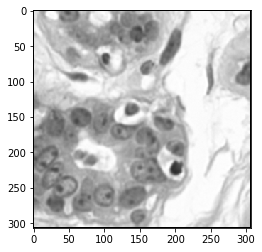

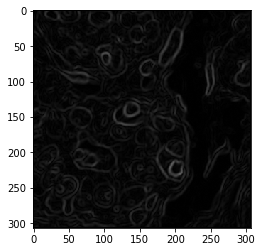

[[1 1 1 ... 1 1 1]
 [1 2 2 ... 2 2 1]
 [1 2 2 ... 2 2 1]
 ...
 [1 2 2 ... 2 2 1]
 [1 2 2 ... 2 2 1]
 [1 1 1 ... 1 1 1]]
[[  0   0   0 ...   0   0   0]
 [  0 228 226 ... 249 245   0]
 [  0 227 227 ... 245 240   0]
 ...
 [  0 209 213 ... 191 189   0]
 [  0 211 220 ... 192 189   0]
 [  0   0   0 ...   0   0   0]]


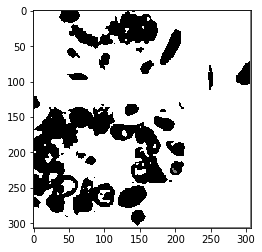

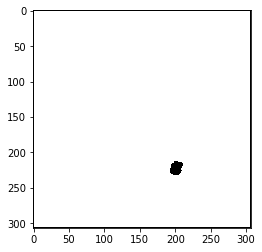

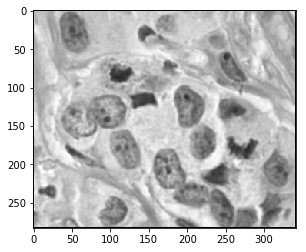

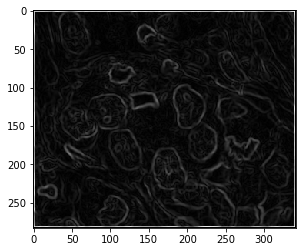

[[1 1 1 ... 1 1 1]
 [1 2 2 ... 2 2 1]
 [1 2 2 ... 2 2 1]
 ...
 [1 2 2 ... 2 2 1]
 [1 2 2 ... 2 2 1]
 [1 1 1 ... 1 1 1]]
[[  0   0   0 ...   0   0   0]
 [  0 185 185 ... 226 221   0]
 [  0 183 184 ... 230 224   0]
 ...
 [  0 185 191 ... 215 213   0]
 [  0 198 203 ... 220 210   0]
 [  0   0   0 ...   0   0   0]]


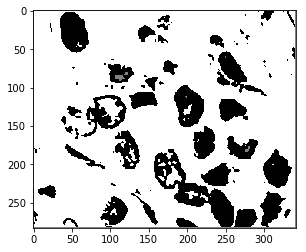

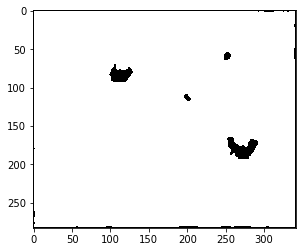

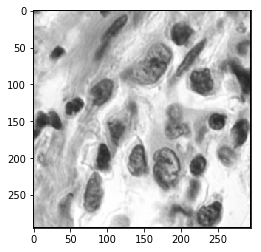

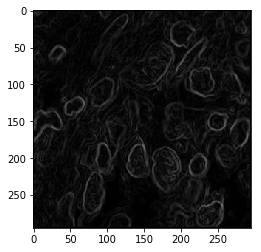

[[1 1 1 ... 1 1 1]
 [1 0 0 ... 2 2 1]
 [1 0 0 ... 2 2 1]
 ...
 [1 2 2 ... 2 2 1]
 [1 2 2 ... 2 2 1]
 [1 1 1 ... 1 1 1]]
[[  0   0   0 ...   0   0   0]
 [  0  77  81 ... 187 191   0]
 [  0  89  92 ... 193 200   0]
 ...
 [  0 177 180 ... 243 243   0]
 [  0 178 181 ... 242 243   0]
 [  0   0   0 ...   0   0   0]]


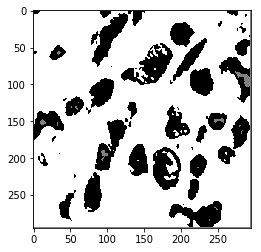

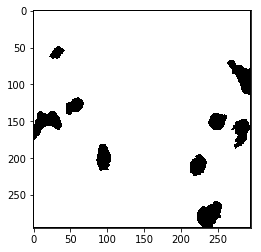

In [ ]:
newData = color(data)

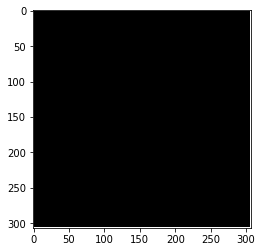

In [25]:
cv2.imwrite("greyscale.png",data[0])
cv2.imwrite("segmentation.png",newData[0])
plt.imshow(newData[0], cmap='gray')
plt.show()